### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix 
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import fcluster
import scipy.spatial.distance as ssd
import os
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from matplotlib import pylab
%matplotlib inline

### ir para a pasta de dados

In [2]:
cd C:/Users/eduardo.zanutti/OneDrive - Apsen Farmaceutica S A/Documentos/MBA DataScience/aula_5_analise_cluster/Nao_Supervisionado_USP/dados/

C:\Users\eduardo.zanutti\OneDrive - Apsen Farmaceutica S A\Documentos\MBA DataScience\aula_5_analise_cluster\Nao_Supervisionado_USP\dados


###  Verificar arquivos

In [3]:
ls

 O volume na unidade C ‚ OS
 O N£mero de S‚rie do Volume ‚ B250-E116

 Pasta de C:\Users\eduardo.zanutti\OneDrive - Apsen Farmaceutica S A\Documentos\MBA DataScience\aula_5_analise_cluster\Nao_Supervisionado_USP\dados

14/07/2021  16:10    <DIR>          .
14/07/2021  16:10    <DIR>          ..
03/02/2020  16:58                73 alunos_pap.csv
14/07/2021  16:09            17.774 cars_clus.csv
03/02/2020  14:53             1.503 MCDONALDS.csv
03/02/2020  14:53            39.475 municipios.csv
03/11/2020  11:49            13.810 notas_categ.xlsx
               5 arquivo(s)         72.635 bytes
               2 pasta(s)   70.613.200.896 bytes dispon¡veis


 ### Criar caminho da pasta e arquivo 

In [4]:
mc_file = 'MCDONALDS.csv'
cluster_folder = 'C:/Users/eduardo.zanutti/OneDrive - Apsen Farmaceutica S A/Documentos/MBA DataScience/aula_5_analise_cluster/Nao_Supervisionado_USP/dados/'
mc_path=os.path.join(cluster_folder,mc_file)

In [5]:
print(mc_path)

C:/Users/eduardo.zanutti/OneDrive - Apsen Farmaceutica S A/Documentos/MBA DataScience/aula_5_analise_cluster/Nao_Supervisionado_USP/dados/MCDONALDS.csv


### Importar dataset 

In [6]:
df_mc=pd.read_csv(mc_path,sep=';',decimal=',')

In [7]:
df_mc.head()

,Lanche,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
0,Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.5
1,Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2
2,Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.0
3,Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.0
4,Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.0


In [11]:
df_mc.loc[df_mc.Lanche=='Big Mac','Valor Energetico']

0    504
Name: Valor Energetico, dtype: int64

In [8]:
df_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lanche              25 non-null     object 
 1   Valor Energetico    25 non-null     int64  
 2   Carboidratos        25 non-null     int64  
 3   Proteinas           25 non-null     int64  
 4   Gorduras Totais     25 non-null     float64
 5   Gorduras Saturadas  25 non-null     float64
 6   Gorduras Trans      25 non-null     float64
 7   Colesterol          25 non-null     int64  
 8   Fibra Alimentar     25 non-null     float64
 9   Sodio               25 non-null     int64  
 10  Calcio              25 non-null     int64  
 11  Ferro               25 non-null     float64
dtypes: float64(5), int64(6), object(1)
memory usage: 2.5+ KB


### Padronizar os Dados 

In [144]:
df_mc.index=df_mc.iloc[:,0]

In [145]:
df_mc=df_mc.iloc[:,1:]

In [146]:
x = df_mc.values #Extrair array do DataFrame
x = np.nan_to_num(x) #substituir nulos por 0
#df_standardized_manual = (df_mc - df_mc.mean()) / df_mc.std(ddof=1)
x_std = StandardScaler().fit_transform(x) #Array Pdronizado
df_std=pd.DataFrame(x_std) #Voltar para o DataFrame com os dados padronizados
df_std.columns=df_mc.columns
df_std.index=df_mc.index
df_std

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
Lanche,,,,,,,,,,,
Big Mac,0.061012,-0.039432,-0.226198,0.231040,0.495453,-0.181818,-0.207390,-0.149545,-0.547261,0.135014,0.772999
Big Tasty,2.080827,0.398701,1.187539,2.512109,2.384093,2.090909,1.232820,0.785111,1.001007,2.862701,1.368044
Quarterao,0.382752,-0.587098,0.303953,0.638373,1.125000,1.333333,0.714345,-0.091129,0.172080,1.542451,1.998092
Mcnifico Bacon,0.781949,-0.368032,0.569029,1.045707,1.125000,1.333333,0.973582,0.084119,0.281667,0.720408,2.348119
Cheddar McMelt,0.078886,-0.915698,0.127236,0.393973,0.810227,1.143939,0.570323,-0.500041,-0.943460,0.595856,1.998092
McFish,-0.719507,-0.368032,-0.844708,-0.665095,-0.480344,-0.371212,-0.524237,-0.908953,-1.072716,0.209745,-0.172073
McChicken,-0.236896,-0.148965,-0.844708,0.068106,-0.448867,-0.560606,-0.351411,-0.383209,-0.243789,-1.048229,-0.102068
McChicken Jr,-0.934001,-0.915698,-1.286500,-0.583628,-0.684947,-0.371212,-1.445972,-0.266377,-1.466105,-1.160325,-0.417092
Chicken Classic Crispy,-0.022403,1.165434,-0.314556,-0.339228,-0.700685,-0.750000,-0.812279,1.719767,0.579518,-1.409429,-0.627108


###  Criar matriz de distâncias

In [147]:
dist_matrix = distance_matrix(x_std,x_std)

In [148]:
dist_matrix = distance_matrix(df_std,df_std) #Criar Matriz de distâncias
df_dist_matrix=pd.DataFrame(dist_matrix) #Transformar em DataFrame a Matriz de Distâncias
df_dist_matrix.index=df_mc.index
df_dist_matrix.columns=df_mc.index
df_dist_matrix

Lanche,Big Mac,Big Tasty,Quarterao,Mcnifico Bacon,Cheddar McMelt,McFish,McChicken,McChicken Jr,Chicken Classic Crispy,Chicken Classic Grill,...,Hamburger,Wrap Grill Maionese,Wrap Crispy Maionese,Wrap Grill Lemon,Wrap Crispy Lemon,Chicken Bacon Crispy,Chicken Bacon Grill,Angus Bacon,Angus Deluxe,CBO
Lanche,,,,,,,,,,,,,,,,,,,,,
Big Mac,0.000000,5.774519,2.897350,3.094498,2.318238,2.177795,1.969343,3.234387,3.608421,3.302315,...,3.649980,3.478958,3.169008,3.737345,3.419366,1.802639,2.627490,6.285993,5.940909,2.395311
Big Tasty,5.774519,0.000000,3.764287,3.686882,5.111455,7.522566,7.328849,8.702987,7.774952,7.939791,...,9.209524,8.384685,8.061700,8.724944,8.446087,5.954133,6.808232,3.763362,3.418213,4.503733
Quarterao,2.897350,3.764287,0.000000,1.162640,1.659712,4.472379,4.560811,5.706616,5.798998,5.474270,...,5.930663,5.520068,5.344250,5.797394,5.660298,3.601210,3.970892,5.297623,4.996225,2.967406
Mcnifico Bacon,3.094498,3.686882,1.162640,0.000000,1.921445,4.933418,4.635305,5.978199,5.719459,5.459528,...,6.283975,6.030721,5.836937,6.325840,6.167032,3.795144,4.248232,4.811697,4.513767,2.980269
Cheddar McMelt,2.318238,5.111455,1.659712,1.921445,0.000000,3.633952,3.833500,4.671404,5.569151,4.934184,...,4.765770,4.783869,4.748734,5.023343,5.022020,3.614779,3.485841,6.253470,5.894813,3.398297
McFish,2.177795,7.522566,4.472379,4.933418,3.633952,0.000000,1.853684,1.985953,3.996067,3.261320,...,1.998384,1.737411,1.631289,1.812888,1.655440,2.685697,2.612583,7.899624,7.576190,3.965412
McChicken,1.969343,7.328849,4.560811,4.635305,3.833500,1.853684,0.000000,2.145449,2.835276,2.522240,...,2.749016,2.708943,2.285554,2.936522,2.486291,2.097381,2.726125,7.213114,6.916137,3.626321
McChicken Jr,3.234387,8.702987,5.706616,5.978199,4.671404,1.985953,2.145449,0.000000,3.866177,3.400554,...,1.309090,2.530480,2.258486,2.529308,2.198884,3.795297,3.713220,8.944105,8.598952,5.222998
Chicken Classic Crispy,3.608421,7.774952,5.798998,5.719459,5.569151,3.996067,2.835276,3.866177,0.000000,2.107131,...,4.767856,4.787181,4.224165,4.901677,4.278740,3.109748,4.139718,7.030858,6.836160,4.105938


### Condensar a matriz de distâncias

In [149]:
import scipy.spatial.distance as ssd
# convert the redundant n*n square matrix form into a condensed nC2 array
distArray = ssd.squareform(dist_matrix)

### Clusterizar

In [150]:
z = hierarchy.linkage(distArray,method = 'single',metric='euclidean')

In [151]:
#agglom = AgglomerativeClustering(n_clusters = 4, linkage = "single")
#agglom.fit(x_std)
#df_mc['sklearn.cluster']=agglom.labels_

### Dendograma

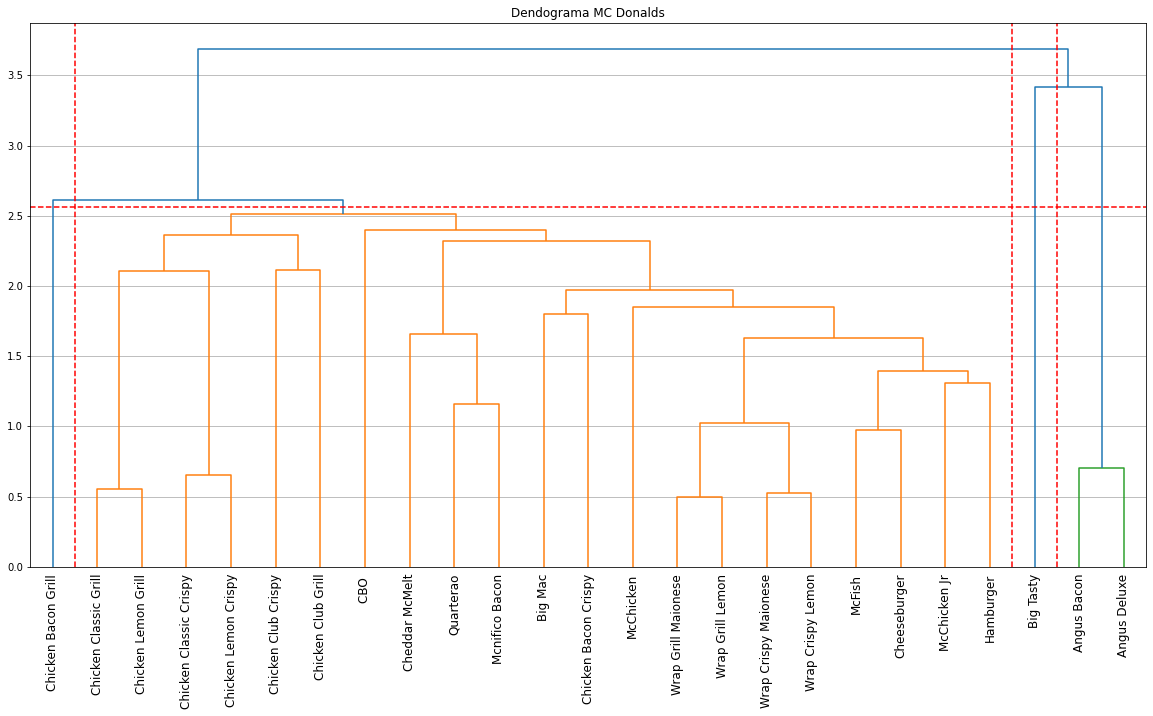

In [152]:
threshold = 2.56 #Defina o valor de threshold para a formação de grupos
dendro = hierarchy.dendrogram(z,  labels=df_mc.index, color_threshold=threshold,leaf_rotation=90, leaf_font_size=12, orientation = 'top')
fig = plt.gcf()
fig.set_size_inches(20, 10)
titulo=plt.title('Dendograma MC Donalds')
plt.grid(axis='y')
plt.axhline(linestyle='--', y=threshold,c='red')
plt.axvline(linestyle='--', x=10,c='red')
plt.axvline(linestyle='--', x=220,c='red')
plt.axvline(linestyle='--', x=230,c='red')

### Criação dos clusters

In [153]:
k = 4 #escolha o número de grupos
clusters = fcluster(z, k, criterion='maxclust')
df_mc['cluster']=clusters

In [154]:
df_mc

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster
Lanche,,,,,,,,,,,,
Big Mac,504,41,25,27.0,12.0,0.5,54,3.5,960,162,6.50,1
Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.20,4
Quarterao,558,36,31,32.0,16.0,1.3,86,3.6,1216,275,10.00,1
Mcnifico Bacon,625,38,34,37.0,16.0,1.3,95,3.9,1255,209,11.00,1
Cheddar McMelt,507,33,29,29.0,14.0,1.2,81,2.9,819,199,10.00,1
McFish,373,38,18,16.0,5.8,0.4,43,2.2,773,168,3.80,1
McChicken,454,40,18,25.0,6.0,0.3,49,3.1,1068,67,4.00,1
McChicken Jr,337,33,13,17.0,4.5,0.4,11,3.3,633,58,3.10,1
Chicken Classic Crispy,490,52,24,20.0,4.4,0.2,33,6.7,1361,38,2.50,1


###  Analíse média de macronutrientes por cluster

In [155]:
df_mc.groupby(['cluster']).mean()

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro
cluster,,,,,,,,,,,
1,445.333333,40.238095,24.0,20.861905,7.157143,0.447619,50.428571,3.609524,1074.952381,135.571429,4.161429
2,425.000000,31.000000,39.0,16.000000,5.000000,0.400000,83.000000,3.000000,1151.000000,161.000000,3.900000
3,862.000000,56.500000,52.5,47.500000,21.000000,1.700000,142.000000,5.000000,1816.500000,195.000000,3.900000
4,843.000000,45.000000,41.0,55.000000,24.000000,1.700000,104.000000,5.100000,1511.000000,381.000000,8.200000


###  Cluster 1

##### Lanches Tradicionais 

In [156]:
df_mc[df_mc['cluster']==1].sort_values(['Valor Energetico'])

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster
Lanche,,,,,,,,,,,,
Hamburger,257,31,13,9.3,4.1,0.3,22,1.9,542,70,4.20,1
Wrap Grill Lemon,306,30,19,12.0,2.1,0.1,38,1.1,829,175,0.78,1
Cheeseburger,310,32,15,14.0,7.0,0.4,31,1.9,781,146,4.20,1
McChicken Jr,337,33,13,17.0,4.5,0.4,11,3.3,633,58,3.10,1
Wrap Crispy Lemon,338,34,14,16.0,3.3,0.1,21,1.8,974,172,0.77,1
Wrap Grill Maionese,340,29,19,16.0,3.4,0.1,42,1.2,888,175,0.83,1
Wrap Crispy Maionese,372,33,14,20.0,4.6,0.2,25,1.8,1032,172,0.81,1
McFish,373,38,18,16.0,5.8,0.4,43,2.2,773,168,3.80,1
Chicken Lemon Grill,389,46,34,7.8,0.8,0.2,63,5.5,1001,43,2.50,1


###  Cluster 2

##### Proteico e com baixo teor de gordura

In [157]:
df_mc[df_mc['cluster']==2].sort_values(['Valor Energetico'])

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster
Lanche,,,,,,,,,,,,
Chicken Bacon Grill,425,31,39,16.0,5.0,0.4,83,3.0,1151,161,3.9,2


###  Cluster 3

##### Top Calóricos 

In [158]:
df_mc[df_mc['cluster']==3].sort_values(['Valor Energetico'])

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster
Lanche,,,,,,,,,,,,
Angus Bacon,861,57,54,46.0,21.0,1.7,145,5.0,1917,193,4.0,3
Angus Deluxe,863,56,51,49.0,21.0,1.7,139,5.0,1716,197,3.8,3


###  Cluster 4

##### Mais gorduroso

In [159]:
df_mc[df_mc['cluster']==4].sort_values(['Valor Energetico'])

,Valor Energetico,Carboidratos,Proteinas,Gorduras Totais,Gorduras Saturadas,Gorduras Trans,Colesterol,Fibra Alimentar,Sodio,Calcio,Ferro,cluster
Lanche,,,,,,,,,,,,
Big Tasty,843,45,41,55.0,24.0,1.7,104,5.1,1511,381,8.2,4


### Criar labels para os clusters

In [160]:
nome_clusters=[[1,'Lanches Tradicionais'],
               [2,'Proteico e com baixo teor de gordura'],
               [3,'Top Calóricos'],
               [4,'Mais gorduroso']]

In [161]:
df_nome_clusters=pd.DataFrame(np.array(nome_clusters),columns=['cluster','cluster_name'])

In [162]:
df_nome_clusters

,cluster,cluster_name
0,1,Lanches Tradicionais
1,2,Proteico e com baixo teor de gordura
2,3,Top Calóricos
3,4,Mais gorduroso


In [163]:
df_nome_clusters['cluster']=df_nome_clusters['cluster'].astype(int)

### Merge com o DataFrame principal

In [164]:
df_mc_clus_nm=pd.merge(df_mc,df_nome_clusters,how='left',on=['cluster'])

In [165]:
df_mc_clus_nm.index=df_mc.index

In [166]:
df_mc=df_mc_clus_nm

### Fução para os labels com os clusters no dendograma

In [167]:
def llf(id):
    return '%s - %s - cluster [%s]' % (df_mc['cluster_name'][id],df_mc.index[id],int(float(df_mc['cluster'][id])))

In [168]:
#vertical
#dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, color_threshold=threshold,leaf_rotation=0, leaf_font_size=12, orientation = 'right')
#fig = plt.gcf()
#fig.set_size_inches(20, 15)
#titulo=plt.title('Dendograma MC Donalds')
#plt.grid(axis='x')
#plt.axvline(linestyle='--', x=threshold) 

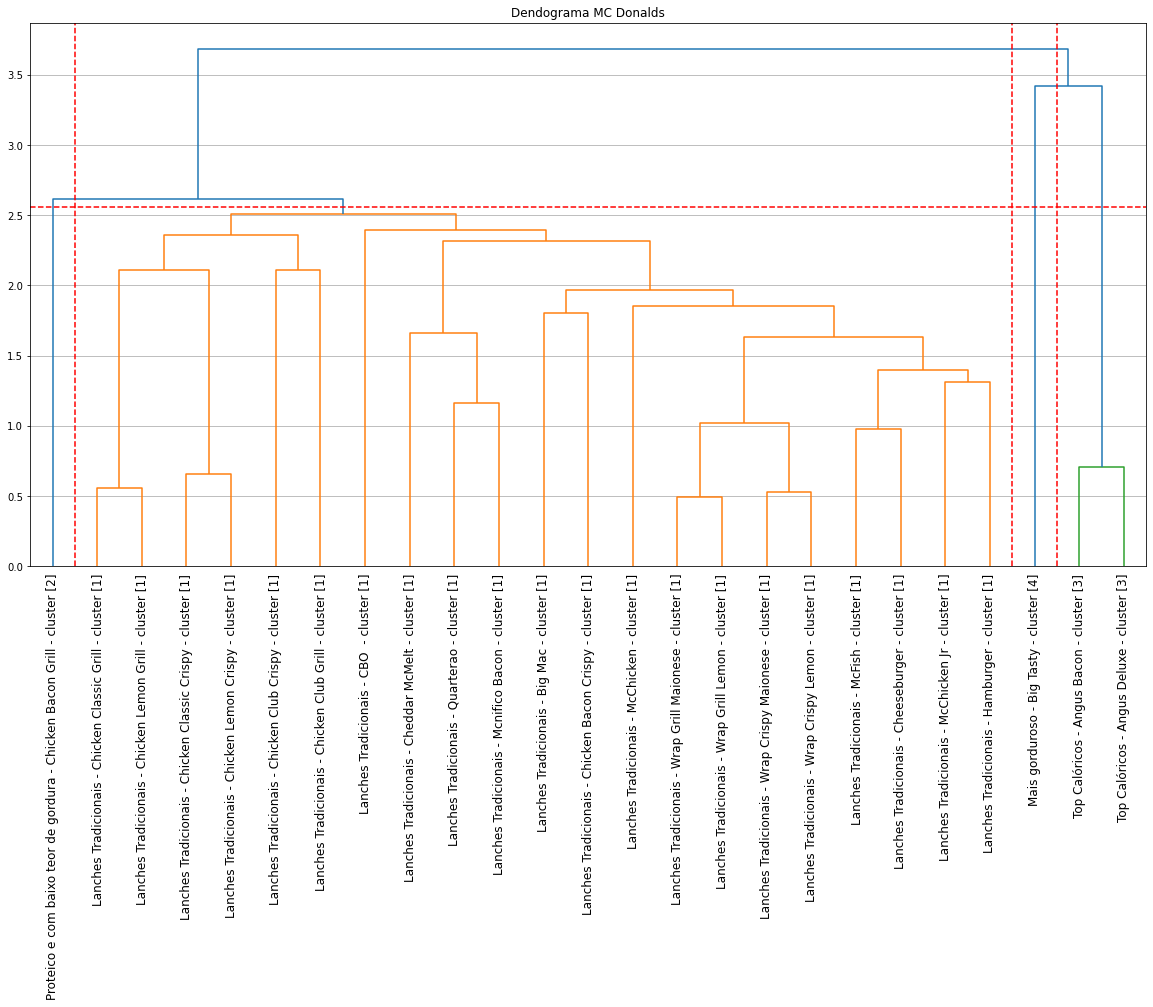

In [169]:
#horizontal
dendro = hierarchy.dendrogram(z,  leaf_label_func=llf, color_threshold=threshold,leaf_rotation=90, leaf_font_size=12, orientation = 'top')
fig = plt.gcf()
fig.set_size_inches(20, 10)
titulo=plt.title('Dendograma MC Donalds')
plt.grid(axis='y')
plt.axhline(linestyle='--', y=threshold,c='red')
plt.axvline(linestyle='--', x=10,c='red')
plt.axvline(linestyle='--', x=220,c='red')
plt.axvline(linestyle='--', x=230,c='red')